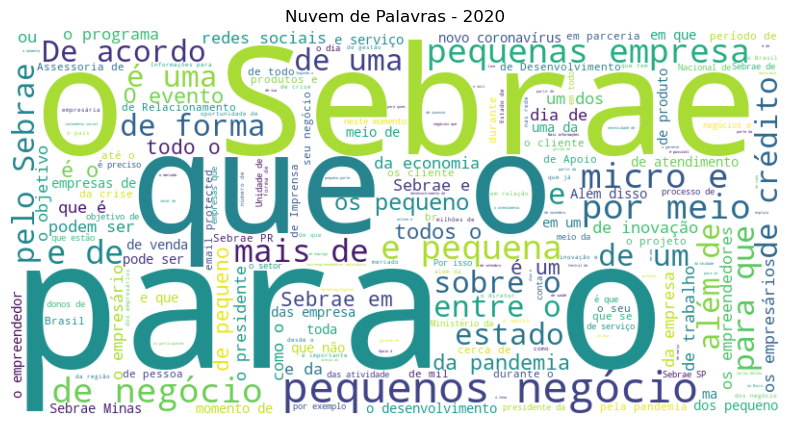

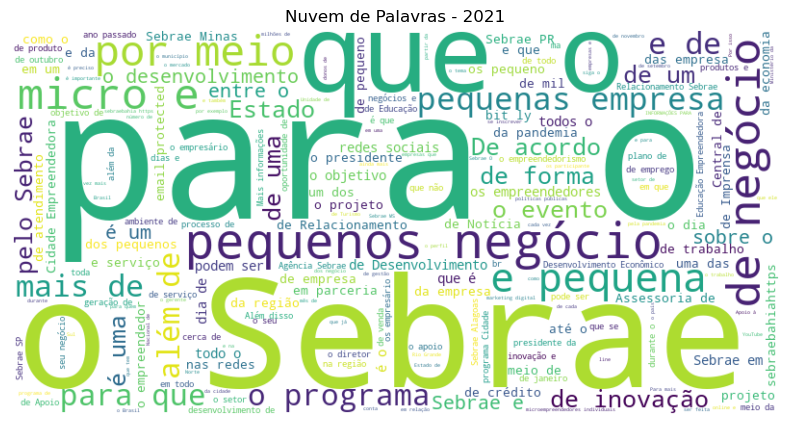

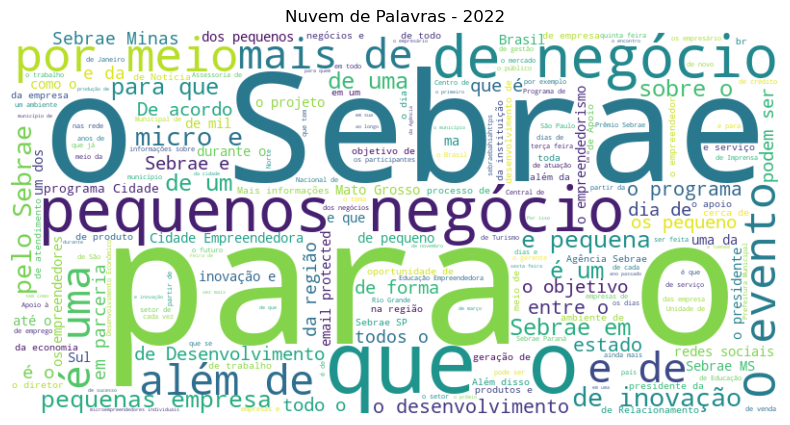

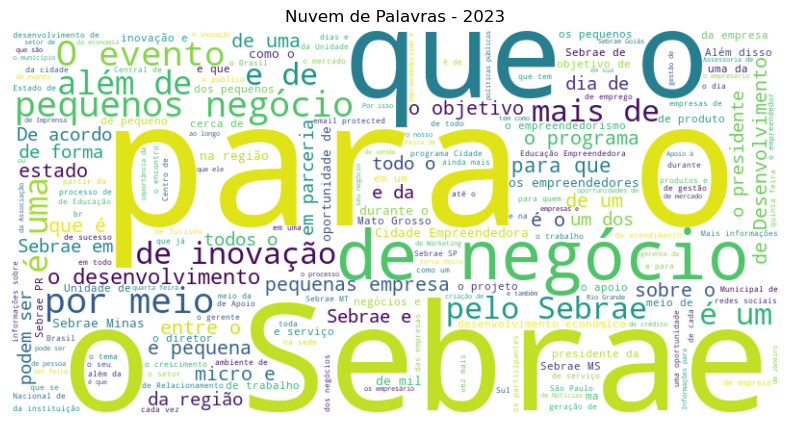

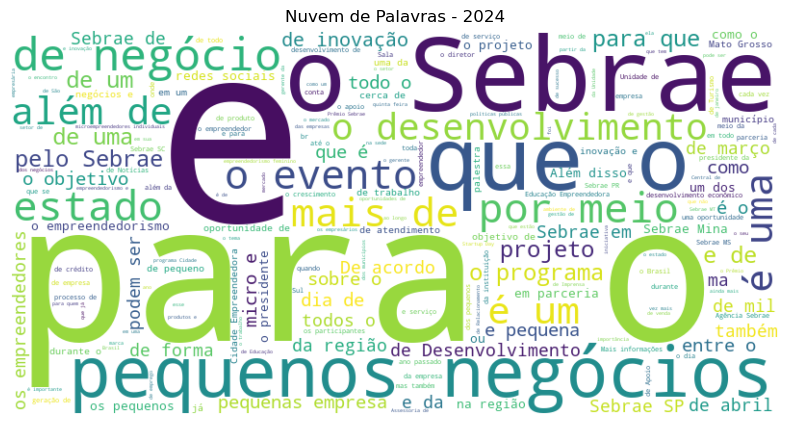

In [1]:
# Word Cloud do DataFrame com stopwords

!pip install wordcloud

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Carregar o dataset
file_path = r'C:\Users\Thairone Almeida\Google Drive\Thairone\Hashtag Treinamentos\Python Impressionador\Script\MBA_USP_ESALQ\Dados até 30 04 2024\ws_agencia_sebrae_noticias.xlsx'
df = pd.read_excel(file_path)

# Converter 'Data de Publicação' para datetime
df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'], errors='coerce')

# Remover entradas com datas inválidas
df = df.dropna(subset=['Data de Publicação'])

# Extrair o ano da 'Data de Publicação'
df['Ano'] = df['Data de Publicação'].dt.year

# Remover entradas onde 'Texto' não é string
df = df[df['Texto'].apply(lambda x: isinstance(x, str))]

# Função para gerar nuvens de palavras
def generate_wordclouds(df, start_year, end_year):
    for year in range(start_year, end_year + 1):
        text = " ".join(df[df['Ano'] == year]['Texto'])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Nuvem de Palavras - {year}')
        plt.axis('off')
        plt.show()

# Gerar nuvens de palavras para 2020 a 2024
generate_wordclouds(df, 2020, 2024)

[nltk_data] Downloading package stopwords to C:\Users\Thairone
[nltk_data]     Almeida\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


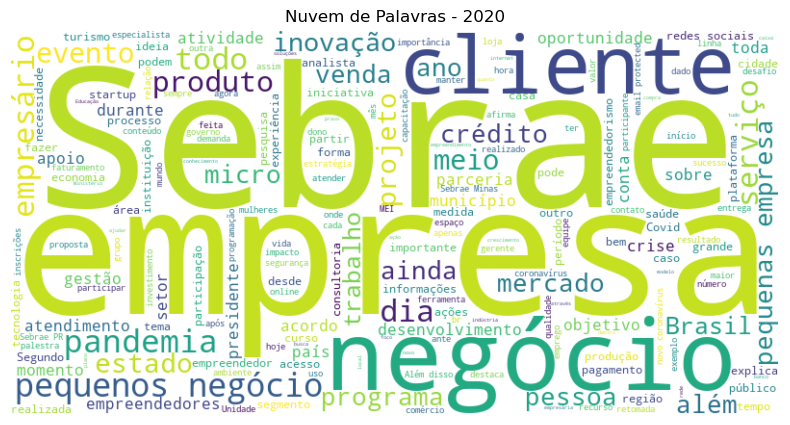

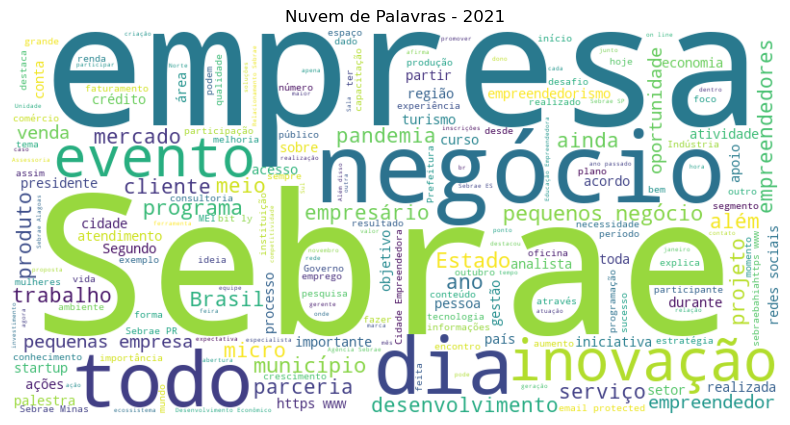

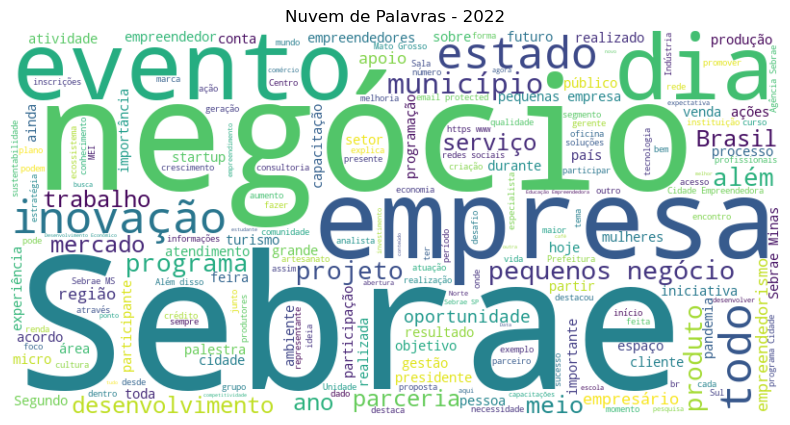

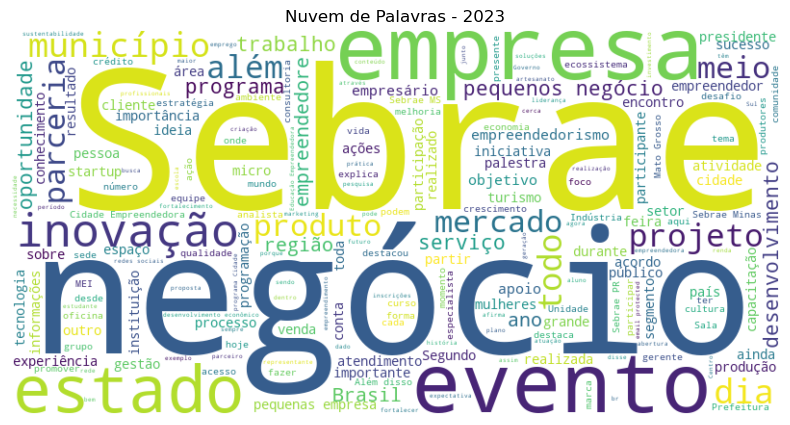

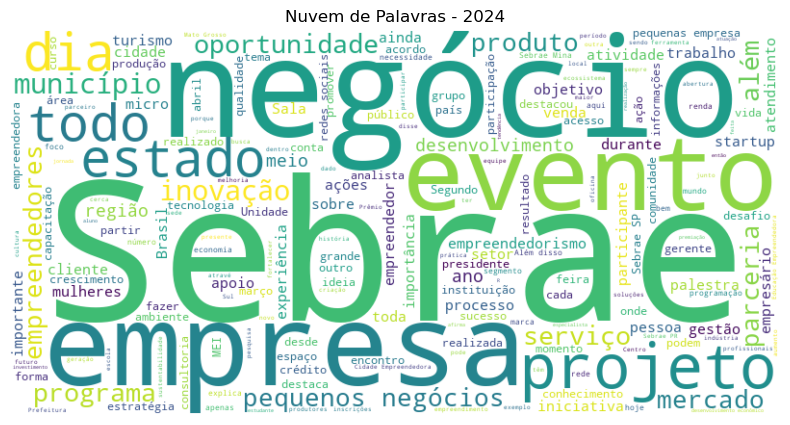

In [3]:
# Word Cloud do DataFrame sem stopwords (uso do pacote NLTK)

!pip install wordcloud nltk

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords

# Baixar os stopwords em português
nltk.download('stopwords')
stop_words = set(stopwords.words('portuguese'))

# Carregar o dataset
file_path = r'C:\Users\Thairone Almeida\Google Drive\Thairone\Hashtag Treinamentos\Python Impressionador\Script\MBA_USP_ESALQ\Dados até 30 04 2024\ws_agencia_sebrae_noticias.xlsx'
df = pd.read_excel(file_path)

# Converter 'Data de Publicação' para datetime
df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'], errors='coerce')

# Remover entradas com datas inválidas
df = df.dropna(subset=['Data de Publicação'])

# Extrair o ano da 'Data de Publicação'
df['Ano'] = df['Data de Publicação'].dt.year

# Remover entradas onde 'Texto' não é string
df = df[df['Texto'].apply(lambda x: isinstance(x, str))]

# Função para gerar nuvens de palavras
def generate_wordclouds(df, start_year, end_year, stop_words):
    for year in range(start_year, end_year + 1):
        text = " ".join(df[df['Ano'] == year]['Texto'])
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'Nuvem de Palavras - {year}')
        plt.axis('off')
        plt.show()

# Gerar nuvens de palavras para 2020 a 2024
generate_wordclouds(df, 2020, 2024, stop_words)

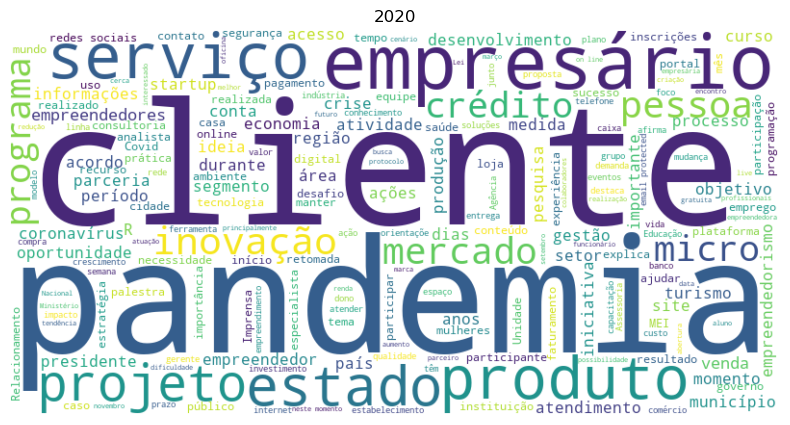

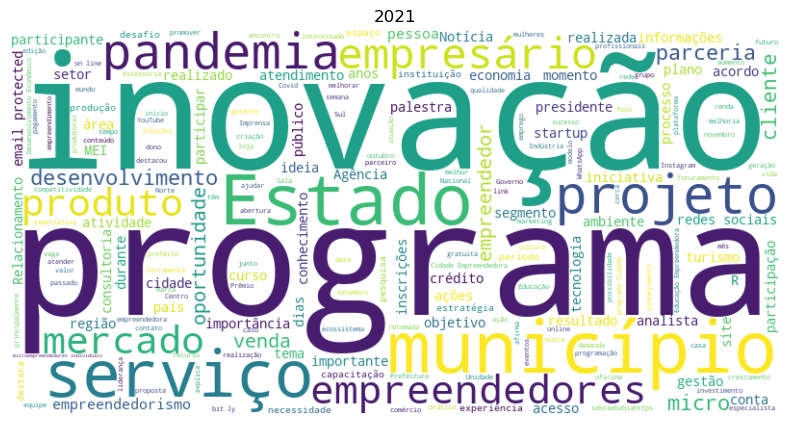

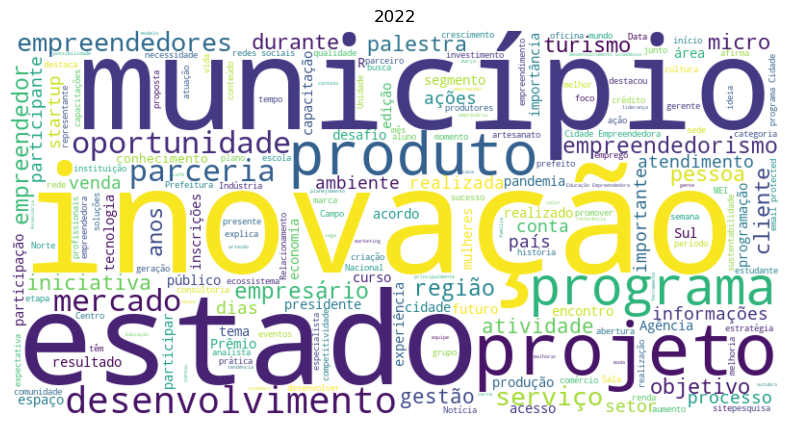

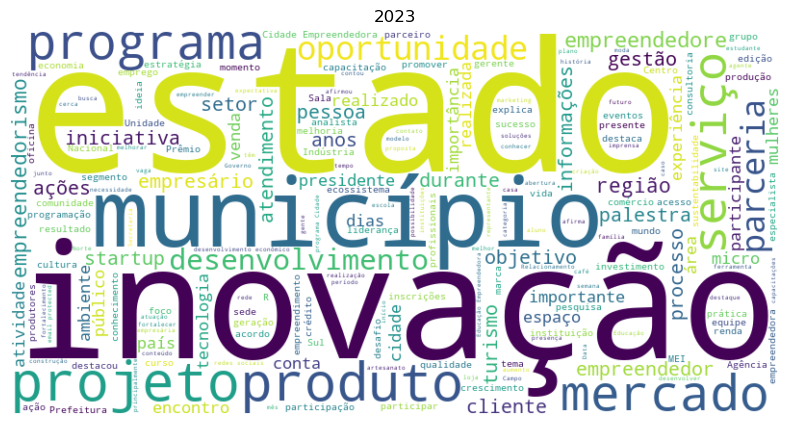

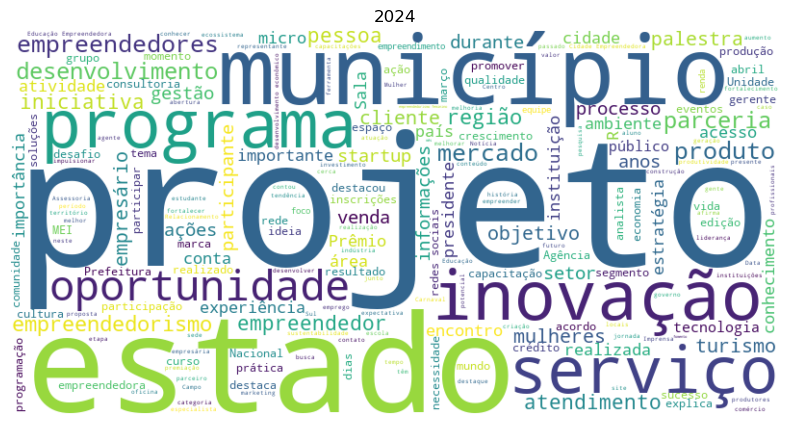

In [5]:
# Word Cloud do DataFrame sem stopwords (uso de stopwords específicas)

import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# Definição das stopwords específicas
stop_words = set([
    '0800', 'a', 'as', 'à', 'às', 'aquela', 'aquelas', 'aquele', 'aqueles', 'aquilo', 'acerca', 'adeus', 'agora', 'ainda', 'algo', 'algumas', 'alguns', 'ali', 'além', 'alô', 'ambos', 'ampla', 'amplas', 'amplo', 'amplos', 'ano', 'ante', 'antes', 'ao', 'aos', 'apenas', 'apoio', 'após', 'aqui', 'assim', 'atrás', 'através', 'até', 'aí', 'baixo', 'bem', 'boa', 'boas', 'bom', 'bons', 'breve', 'cada', 'catorze', 'cedo', 'cento', 'certamente', 'certeza', 'cinco', 'cima', 'coisa', 'coisas', 'com', 'como', 'conselho', 'contudo', 'contra', 'cá', 'da', 'das', 'dado', 'dados', 'dela', 'delas', 'dele', 'deles', 'demais', 'debaixo', 'de', 'dentro', 'depois', 'desde', 'dessa', 'dessas', 'desse', 'desses', 'desta', 'destas', 'deste', 'destes', 'devendo', 'deve', 'devem', 'deverá', 'dez', 'dezoito', 'dia', 'diante', 'disse', 'disso', 'disto', 'dito', 'diz', 'dizem', 'dizer', 'do', 'dos', 'dois', 'doze', 'duas', 'dúvida', 'e', 'é', 'ela', 'elas', 'ele', 'eles', 'embora', 'em', 'empresa', 'empresas', 'enquanto', 'entre', 'então', 'era', 'eram', 'éramos', 'essa', 'essas', 'esse', 'esses', 'está', 'estamos', 'estão', 'esta', 'estar', 'estas', 'estava', 'estavam', 'estávamos', 'este', 'esteja', 'estejam', 'estejamos', 'estes', 'esteve', 'estive', 'estivemos', 'estiver', 'estivera', 'estiveram', 'estivéramos', 'estiverem', 'estivermos', 'estivesse', 'estivessem', 'estivéssemos', 'estou', 'eu', 'evento', 'exemplo', 'falta', 'favor', 'faz', 'fazem', 'fazemos', 'fazendo', 'fazer', 'fazeres', 'faço', 'feita', 'feitas', 'feito', 'feitos', 'fim', 'final', 'fomos', 'fôramos', 'fora', 'for', 'foram', 'forma', 'formos', 'fosse', 'fossem', 'fôssemos', 'foi', 'fui', 'geral', 'grande', 'grandes', 'grátis', 'haja', 'hajam', 'hajamos', 'hão', 'haver', 'havemos', 'havia', 'hei', 'hoje', 'hora', 'horas', 'houve', 'houvemos', 'houver', 'houvera', 'houverá', 'houveram', 'houvéramos', 'houverão', 'houverei', 'houverem', 'houveremos', 'houveria', 'houveriam', 'houveríamos', 'houvermos', 'houvesse', 'houvessem', 'houvéssemos', 'há', 'https', 'isso', 'isto', 'já', 'la', 'lado', 'lhe', 'lhes', 'ligado', 'lo', 'local', 'logo', 'longe', 'lugar', 'lá', 'maior', 'maioria', 'maiorias', 'mal', 'mais', 'mas', 'me', 'meio', 'menor', 'menos', 'meses', 'mesma', 'mesmas', 'mesmo', 'mesmos', 'meu', 'meus', 'minha', 'minhas', 'mil', 'milhões', 'milhares', 'muito', 'muitas', 'muitos', 'na', 'nas', 'nada', 'não', 'naquela', 'naquelas', 'naquele', 'naqueles', 'nas', 'negócio', 'negócios', 'nem', 'nesta', 'nestas', 'nessa', 'nessas', 'nesse', 'nesses', 'ninguém', 'nível', 'no', 'nos', 'noite', 'nome', 'nossa', 'nossas', 'nosso', 'nossos', 'nova', 'novas', 'nove', 'novo', 'novos', 'num', 'numa', 'nunca', 'número', 'nós', 'o', 'obra', 'obrigada', 'obrigado', 'oitava', 'oitavo', 'oito', 'onde', 'ontem', 'onze', 'os', 'ou', 'outra', 'outras', 'outro', 'outros', 'para', 'parece', 'parte', 'partir', 'pela', 'pelas', 'pelo', 'pelos', 'pequena', 'pequenas', 'pequeno', 'pequenos', 'per', 'perante', 'perto', 'pode', 'podem', 'podendo', 'poder', 'poderá', 'poderão', 'poderia', 'poderiam', 'podia', 'podiam', 'pois', 'ponto', 'pontos', 'por', 'porque', 'porquê', 'posição', 'possivelmente', 'possível', 'posso', 'pouca', 'poucas', 'pouco', 'poucos', 'primeira', 'primeiras', 'primeiro', 'primeiros', 'própria', 'próprias', 'próprio', 'próprios', 'próxima', 'próximas', 'próximo', 'próximos', 'pude', 'qual', 'quais', 'qualquer', 'quando', 'quanto', 'quantos', 'quarta', 'quarto', 'quatro', 'que', 'quer', 'querem', 'quero', 'quem', 'questão', 'quinta', 'quinto', 'quinze', 'relação', 'sabe', 'sabem', 'se', 'sebrae', 'segunda', 'segundo', 'sei', 'seis', 'seja', 'sejam', 'sem', 'sempre', 'sendo', 'ser', 'será', 'serão', 'seremos', 'seria', 'seriam', 'seríamos', 'sete', 'seu', 'seus', 'sexta', 'sexto', 'si', 'sido', 'sim', 'sistema', 'só', 'sob', 'sobre', 'somente', 'somos', 'sou', 'sua', 'suas', 'são', 'tal', 'talvez', 'também', 'tampouco', 'tanta', 'tantas', 'tarde', 'tanto', 'te', 'tem', 'tém', 'temos', 'tendo', 'tenha', 'tenham', 'tenhamos', 'tenho', 'ter', 'terá', 'terão', 'terceira', 'terceiro', 'terei', 'teremos', 'teria', 'teriam', 'teríamos', 'teve', 'teu', 'teus', 'tido', 'tinha', 'tinham', 'tínhamos', 'tipo', 'tive', 'tivemos', 'tiver', 'tivera', 'tiveram', 'tivéramos', 'tiverem', 'tivermos', 'tivesse', 'tivessem', 'tivéssemos', 'toda', 'todas', 'todo', 'todos', 'trabalho', 'três', 'treze', 'tu', 'tua', 'tuas', 'tudo', 'um', 'uma', 'umas', 'uns', 'usa', 'usar', 'vai', 'vais', 'vem', 'vendo', 'ver', 'vez', 'vezes', 'vindo', 'vir', 'vários', 'você', 'vocês', 'vos', 'vão', 'www', 'à', 'é', 'última', 'últimas', 'último', 'últimos', 'br', 'ac', 'al', 'ap', 'am', 'ba', 'ce', 'df', 'es', 'go', 'ma', 'mt', 'ms', 'mg', 'pa', 'pb', 'pr', 'pe', 'pi', 'rj', 'rn', 'rs', 'ro', 'rr', 'sc', 'sp', 'se', 'to', 'acre', 'alagoas', 'amazonas', 'bahia', 'ceará', 'distrito', 'espírito', 'santo', 'goiás', 'maranhão', 'mato', 'grosso', 'minas', 'gerais', 'pará', 'paraíba', 'paraná', 'pernambuco', 'piauí', 'rio', 'janeiro', 'grande', 'rondônia', 'roraima', 'santa', 'catarina', 'são', 'paulo', 'sergipe', 'tocantins', 'brasil', 'domingo', 'feira', 'sábado'
])

# Carregar o dataset
file_path = r'C:\Users\Thairone Almeida\Google Drive\Thairone\Hashtag Treinamentos\Python Impressionador\Script\MBA_USP_ESALQ\Dados até 30 04 2024\ws_agencia_sebrae_noticias.xlsx'
df = pd.read_excel(file_path)

# Convertendo 'Data de Publicação' para datetime
df['Data de Publicação'] = pd.to_datetime(df['Data de Publicação'], errors='coerce')

# Remover entradas com datas inválidas
df = df.dropna(subset=['Data de Publicação'])

# Extrair o ano da 'Data de Publicação'
df['Ano'] = df['Data de Publicação'].dt.year

# Remover entradas onde 'Texto' não é string
df = df[df['Texto'].apply(lambda x: isinstance(x, str))]

# Função para gerar nuvens de palavras
def generate_wordclouds(df, start_year, end_year, stop_words):
    for year in range(start_year, end_year + 1):
        text = " ".join(df[df['Ano'] == year]['Texto'])
        wordcloud = WordCloud(width=800, height=400, background_color='white', stopwords=stop_words).generate(text)
        
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.title(f'{year}')
        plt.axis('off')
        plt.show()

# Gerar nuvens de palavras para 2020 a 2024
generate_wordclouds(df, 2020, 2024, stop_words)